# JK302 Visual Impact on Phoneme Perception in Noise with Natural Sentences

We are going to look at the pilot data and try to attack a few key questions with this notebook.

1. How much does lip reading improve phonemic perception of clear vs noisy speech?

2. Does this interaction change over the course of a sentence?

3. Do some phonemes benefit from speechreading more than others?

In [1]:
fig_folder = 'C:\Experiments\JK302\Figures\Rev7'

def export_fig(fig_folder,fig_name):
    # savefig(fname, dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)

    format_name = 'png'
    plt.savefig(os.path.normpath(os.path.join(fig_folder,fig_name + '.' + format_name)),format = format_name, bbox_inches = 'tight',dpi = 300, pad_inches=0.3,transparent = False)

### Loading...

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def load_df(filename):
    df = pd.DataFrame.from_csv(filename)
    #df = pd.DataFrame.from_csv('C:/Experiments/JK302b/dataOut/bigPJK302b_6subs.csv')
    #df = pd.DataFrame.from_csv('C:/Experiments/JK307/dataOut/bigP_r1.csv')

    #Relabel babble condition for clarity
    df.loc[df['VideoCond'] == 'AV',('VideoCond')] = 'Audiovisual'
    df.loc[df['VideoCond'] == 'AO',('VideoCond')] = 'Auditory Only'


    #Make WordIdx start from 1, not zero
    df.WordIdx = df.WordIdx+1

    # Fix phoneme alignment issue (correct word given but phonemes assigned to wrong word)
    # Find where words match
    matchIdx = df['SourceWord'] == df['TargetWord']
    #Set the source phonemes to match the target
    df.loc[matchIdx,('SourcePhoneme')] = df.loc[matchIdx,('TargetPhoneme')] 
    #Reset the measure of phoneme accuracy
    df.loc[:,'PhonemeHitBool'] = df['SourcePhoneme'] == df['TargetPhoneme']
    #Set a measure all phonemes matching
    df.loc[:,('AllPhonsMatch')] = df.groupby('WordCount')['PhonemeHitBool'].transform(lambda x: np.mean(x) ==1)
    #Set a measure all phonemes missing
    df.loc[:,('AllPhonsMiss')] = df.groupby('WordCount')['PhonemeHitBool'].transform(lambda x: np.mean(x) ==0)
    # Make a column for the number of words in the sentence
    df['NumWordsInSentence'] = df.groupby(['SentenceCount'])['WordIdx'].transform(max)
    # Make a column for the number of phonemes in the word
    df['NumPhonemesInWord'] = df.groupby(['WordCount'])['PhonemeIndex'].transform(lambda x: np.max(x)-np.min(x)+1)
    #Position of the word in relation to the last word of the sentence
    df['WordFromLast'] = df['NumWordsInSentence']-df['WordIdx']
    # Calculate dB from RMS values
    import math
    def amp2db(scalar):
        return 20 * math.log10(scalar)
    df['SpeechdB'] =  df['SpeechRMS'].apply(lambda x: amp2db(x) if x >=0 else 0)
    df['SpeechdBRel'] = df[['SpeechdB','SentenceCount']].groupby('SentenceCount').apply(lambda x: x-np.mean(x))['SpeechdB']
    
    dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme_r5.xlsx'),encoding='latin-1')
    #df = df[df['TargetPhoneme'].isin(dfPT['CMU Phonemes'])]
    df = pd.merge(df, dfPT, how='inner', left_on = 'TargetPhoneme',right_on = 'CMU Phonemes' )
    return df
#df.rename(columns={'0':'PENNPOS'}, inplace=True)
#df.rename(columns={'0.1':'UPOS'}, inplace=True)
df_name = []
df_name.append('C:/Experiments/JK302/dataOut/bigP_24_r3.csv')
df_name.append('C:/Experiments/JK302b/dataOut/bigPJK302b_6subs.csv')
df_name.append('C:/Experiments/JK307/dataOut/bigP_r1.csv')
df_label = []
df_label.append('Main')
df_label.append('Babble_Shaped_Noise')
df_label.append('Flattened_Volume')
dfs = []
dfs.append(load_df(df_name[0]))
dfs.append(load_df(df_name[1]))
dfs.append(load_df(df_name[2]))

C:\Anaconda2_32bit\lib\site-packages\IPython\core\interactiveshell.py:3066: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df = dfs[0]
keys = df.keys()
print "\n".join([x for x in keys])

level_0
Unnamed: 0.1
index
TotalTrialOrder
Talker
SentenceType
SentenceID
Gender
NumWords
AVOrder
SoundCond
VideoCond
CounterBalBlock
TrialOrder
BabbleFile
Subject
SubjectTalkerNum
SourceSentence
TargetSentence
dBSNR
1LogGram
2LogGram
3LogGram
Indx
Word_x
UnTrn
StTrn
NSyll
NPhon
unsDENS
unsFDEN
unsLDEN
unsCDEN
strDENS
strFDEN
strLDEN
strCDEN
unsBPAV
unsFBPAV
unsLBPAV
unsCBPAV
strBPAV
strFBPAV
strLBPAV
strCBPAV
unsTPAV
unsFTPAV
unsLTPAV
unsCTPAV
strTPAV
strFTPAV
strLTPAV
strCTPAV
unsPOSPAV
unsFPOSPAV
unsLPOSPAV
unsCPOSPAV
strPOSPAV
strFPOSPAV
strLPOSPAV
strCPOSPAV
unsLCPOSPAV
unsFLCPOSPAV
unsLLCPOSPAV
unsCLCPOSPAV
strLCPOSPAV
strFLCPOSPAV
strLLCPOSPAV
strCLCPOSPAV
SFreq
SCDcnt
PhonemeCount
PhonemeIndex
TargetPhoneme
SourcePhoneme
PhonemeHitBool
WordCount
WordIdx
TargetWord
SourceWord
WordACC
SentenceCount
FileID
OnsetSample
OffsetSample
SpeechRMS
HTKPhoneme
Word_y
WordIndex
Age
SubjectGender
SecondLangBeforeFive
PrimarySecondLanguage
YearsEducation
Handedness
PENNPOS
UPOS
AllPhonsMatch


In [4]:
random

# # dummify rank
# dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')

# # create a clean data frame for the regression
# cols_to_keep = ['admit', 'gre', 'gpa']
# data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])



NameError: name 'random' is not defined

In [5]:
data = pd.read_csv("dietox.csv")
model = sm.MixedLM.from_formula("Weight ~ Time", data, groups=data["Pig"])
result = model.fit()
print result.summary()

IOError: File dietox.csv does not exist

In [6]:
#Make plots prettier
#Edited from Randel Olson and many at StackOverflow
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 


plt.rc('text', color = 'black') 
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('axes', titlesize = 18, labelsize = 14,labelcolor ='black')  
plt.rc('lines', linewidth=2,markersize = 10)
plt.rc('xtick',labelsize = 10,color ='black')
plt.rc('ytick',labelsize = 10,color ='black')
def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in plt._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
%matplotlib inline

In [7]:
#For Error bars 
from __future__ import division
numSubs = len(df['Subject'].unique())
sqrtNmin1 = np.sqrt(numSubs-1)

In [8]:
# Check rpy2
import rpy2.robjects as ro
if __name__ == "__main__":
    # Do a very simple calculation using R.
    print(ro.r('paste0("1 + 1 = ", 1 + 1)'))
    
    print ro.r('version')

[1] "1 + 1 = 2"

               _                           

platform       i386-w64-mingw32            

arch           i386                        

os             mingw32                     

system         i386, mingw32               

status                                     

major          3                           

minor          3.1                         

year           2016                        

month          06                          

day            21                          

svn rev        70800                       

language       R                           

version.string R version 3.3.1 (2016-06-21)

nickname       Bug in Your Hair            



In [9]:
#Two way repeated measures ANVOA code from d1Mason (GitHub)

# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np

_dummy_data_anova2 = pd.DataFrame(np.random.rand(30,4) + [[0., 1., 0.2, 0.8]],
                           columns=pd.MultiIndex.from_tuples([
                           ('a0','b0'),('a0','b1'),('a1','b0'),('a1','b1')],
                           names=['factor_a', 'factor_b']),
                           index=range(30))

from collections import namedtuple

ANOVA2 = namedtuple("ANOVA2",["univariate_tests", "sphericity_tests", 
                                  "pval_adjustments", "full_dict"])

def anova2(x, print_summary=False):
    """
    Uses {car} Anova in R, via rpy2, to compute two-way repeeated measures anova.
    ``x`` should be a pandas dataframe of the form::
        
        
        factor_a    a0            a1       
        factor_b    b0     b1     b0     b1
        0          0.3   0.35   0.44   0.49
        1          0.5   0.47   0.92   1.20
        2         43.7  42.60  18.10  17.40
        3          3.8   4.50   9.20  10.40
        4         18.2  17.60  21.30  21.90
        5         22.4  23.10  19.30  19.80
        ...
        
    In the above, there are two "factors", which we have called "factor_a" and
    "factor_b". Here, each of the two factors has two "levels": ["a0", "a1"]
    and ["b0", "b1"]. Note that it is the fact that we have two *factors* that
    makes this a two-way anova, you *can* have more than two levels in each
    factor.
    
    This module includes ``_dummy_data_anova2``, which you can use here.
    
    Note on sphericity:
        The sphericity requirement is, roughly speaking, that all *pairs* of
        levels within a given factor must have roughly the same covariance.
        i.e. the "information" about a repeated measure is distributed evenly 
        across all the levels rather than some of the levels being more correlated
        to each other than others.  Note that if there are only two levels then
        there is only one covariance, so sphericity must be valid 
        (see http://stats.stackexchange.com/a/59206).
        When sphericity is violated, the way to compensate is to reduce the 
        number of degrees of freedom.  There are three similar ways of doing this.
        The most convervative is the "lower bound", then "Greenhouse-G", then
        "Huynh-F". You are recommended to just look at the Greenhouse-G values.
        (see https://youtu.be/wkMwW_2_TzY?t=40m34s).
        
    Returns a namedtuple with three pandas dataframes: 
        univariate_tests, sphericity_tests, and pval_adjustments
    There is also an attribute "full_dict", the values of which are rpy2 objects
    and provide the full output of the anova.
    
    You need to install R, rpy2, and the car package in R.
    Good luck.
    
    DM, Jun 2015.
    """
    from rpy2.robjects import pandas2ri
    from rpy2.robjects.packages import importr
    import rpy2.robjects as R
    pandas2ri.activate()
    car = importr("car")
    
    level_values = x.columns.to_series().reset_index().drop(0,axis=1)
    level_names = x.columns.names
    x = x.copy()
    x.columns = [xx[0] + xx[1] for xx in x.columns]
    R.globalenv["data_x"] = R.r["as.matrix"](pandas2ri.py2ri(x))    
    anova_r = car.Anova(R.r.lm("data_x ~ 1"),
                    idata=pandas2ri.py2ri(level_values),
                    idesign=R.reval("~" + "*".join(level_names)))
    R.r.rm("data_x")
    ret = R.r.summary(anova_r)
    if print_summary:
        print ret

    full_dict = {k.replace(".","_"): v for k,v in ret.items()}
    
    def to_df(v):
        try:
            return pd.DataFrame(pandas2ri.ri2py(v), 
                                columns=v.colnames, 
                                index=v.rownames)
        except TypeError:
            return None
    return ANOVA2(univariate_tests=to_df(full_dict["univariate_tests"]), 
                  sphericity_tests=to_df(full_dict["sphericity_tests"]),
                  pval_adjustments=to_df(full_dict["pval_adjustments"]),
                  full_dict=full_dict)

In [10]:
os.path.normpath(os.path.join(fig_folder,'Main2x2Bar'))

'C:\\Experiments\\JK302\\Figures\\Rev7\\Main2x2Bar'

,SS,num Df,Error SS,den Df,F,Pr(>F)
(Intercept),462732.704433,1,2713.567098,23,3922.089198,3.332280e-27
SoundCond,54531.631976,1,1182.919559,23,1060.281340,9.571646e-21
VideoCond,2372.952049,1,302.463769,23,180.444413,2.254047e-12
SoundCond:VideoCond,1778.966700,1,254.693066,23,160.649187,7.361280e-12


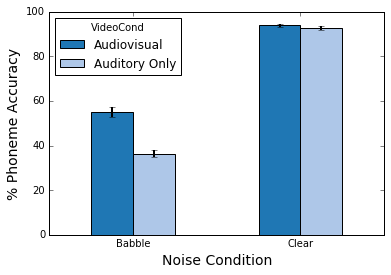

In [11]:
videoByBabble = df[['VideoCond','SoundCond','PhonemeHitBool','Subject']].groupby(['SoundCond','VideoCond','Subject']).mean().apply(lambda x: x*100)
means = videoByBabble.reset_index().groupby(['SoundCond','VideoCond']).mean()['PhonemeHitBool'].unstack()
errors = videoByBabble.reset_index().groupby(['SoundCond','VideoCond']).std()['PhonemeHitBool'].unstack()/np.sqrt(float(numSubs-1))
rmANOVAFormat = videoByBabble.unstack().unstack().transpose().unstack().reset_index(drop = True)
rmanovaOut = anova2(rmANOVAFormat, print_summary=False)

ax = means.plot(kind ='bar',yerr = errors,figsize = (6,4), color = [tableau20[x] for x in [0,1]],rot=0)
ax.set_ylabel('% Phoneme Accuracy')
ax.set_xlabel('Noise Condition')
export_fig(fig_folder,'Main2x2Bar')
rmanovaOut[0]

# errors = (subG.std()['PhonemeHitBool'].unstack()/np.sqrt(float(numSubs-1)))*100
# videoByBabble
# ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
# ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
# ax.set_ylabel('% Phoneme Accuracy')
# ax.set_xlabel('Noise Level')
# ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])

In [12]:

means['Diff'] = means['Audiovisual']- means['Auditory Only']
means

VideoCond,Audiovisual,Auditory Only,Diff
SoundCond,,,
Babble,54.870127,36.317130,18.552998
Clear,93.927709,92.593726,1.333983


In [13]:
errors

VideoCond,Audiovisual,Auditory Only
SoundCond,,
Babble,2.165855,1.592329
Clear,0.676745,0.857067


SoundCond
Babble    0.296865
Clear     0.032276
dtype: float64
Ttest_1sampResult(statistic=12.318992375939084, pvalue=1.3069487196130547e-11)
Ttest_1sampResult(statistic=0.21301270452780999, pvalue=0.83319380969627987)
Ttest_relResult(statistic=-1.7125668778315963, pvalue=0.10024366316576427)


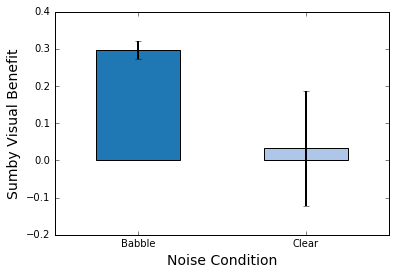

In [14]:
#videoByBabbleInvert = 100-videoByBabble.loc[:,:]
av = videoByBabble.xs('Audiovisual',level = 1,axis=0)
ao = videoByBabble.xs('Auditory Only',level = 1,axis=0)
sumbyRatio = ((av-ao)/(100-ao)).unstack().transpose().reset_index(drop = True)
print sumbyRatio.mean()

sumbyClear = sumbyRatio['Clear']
sumbyBabble = sumbyRatio['Babble']

from scipy.stats import ttest_ind,ttest_rel, ttest_1samp
tbabble = ttest_1samp(sumbyBabble,0)
print tbabble
tclear = ttest_1samp(sumbyClear,0)
print tclear
tbetween = ttest_rel(sumbyClear, sumbyBabble)
print tbetween

means = sumbyRatio.mean()
errors = sumbyRatio.std()/np.sqrt(float(numSubs-1))

ax = means.plot(kind ='bar',yerr = errors,figsize = (6,4), color = [tableau20[x] for x in [0,1]],rot=0)
ax.set_ylabel('Sumby Visual Benefit')
ax.set_xlabel('Noise Condition')
export_fig(fig_folder,'SumbySummary')

In [15]:
def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = next(ax._get_lines.prop_cycler)['color']
    if np.isscalar(yerr) and yerr == 0:
        ymin = 0
        ymax = 0
    elif np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

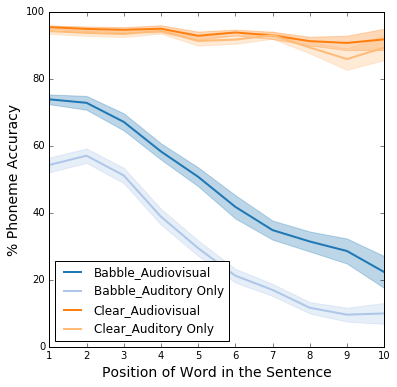

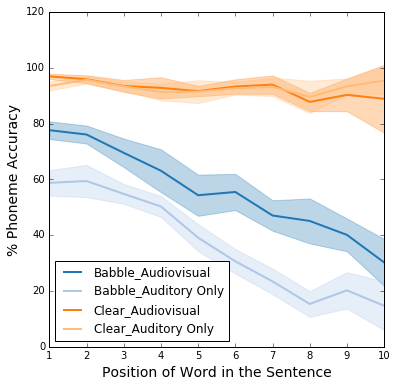

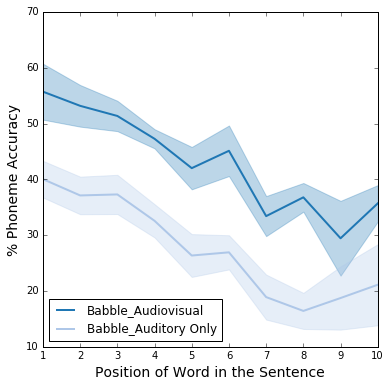

In [16]:
 for df_idx in [0,1,2]:
    df = dfs[df_idx]
    numSubs = len(df['Subject'].unique())
    data = df[['VideoCond','SoundCond','PhonemeHitBool','Subject','WordIdx']].groupby(['WordIdx','VideoCond','SoundCond','Subject']).mean().reset_index()

    means = data[['WordIdx','VideoCond','SoundCond','PhonemeHitBool']].groupby(['WordIdx','VideoCond','SoundCond']).mean()['PhonemeHitBool'].unstack().unstack()
    errors = data[['WordIdx','VideoCond','SoundCond','PhonemeHitBool']].groupby(['WordIdx','VideoCond','SoundCond']).std()['PhonemeHitBool'].unstack().unstack()/np.sqrt(float(numSubs-1))
    means = means *100
    errors = errors*100
    def flattenHierarchicalCol(col,sep = '_'):
        if not type(col) is tuple:
            return col
        else:
            new_col = ''
            for leveli,level in enumerate(col):
                if not level == '':
                    if not leveli == 0:
                        new_col += sep
                    new_col += level
            return new_col

    means.columns = means.columns.map(flattenHierarchicalCol)
    errors.columns = errors.columns.map(flattenHierarchicalCol)
    strkeys = [str(x) for x in means.keys()]
    strkeys
    fig, ax = plt.subplots(figsize = (6,6))
    for x,y in enumerate(means.keys()):
        errorfill(means.index,means[y],errors[y],color = tableau20[x])
    ax.legend(loc='lower left')
    plt.ylabel('% Phoneme Accuracy')
    plt.xlabel('Position of Word in the Sentence')
    export_fig(fig_folder,'PhonACCByWordIdx4_'+ df_label[df_idx])
df = dfs[0]


In [18]:
data1 =  df[['SentenceCount','PhonemeHitBool','PhonemeCount','WordIdx']]
data1
data1 = data1[data1['WordIdx'] == 1]
data1
firsts = data1[['SentenceCount','PhonemeHitBool']].groupby('SentenceCount').all().reset_index()
firsts
firsts.rename(columns={'PhonemeHitBool':'FirstWordWasGood'}, inplace=True)
data = pd.merge(df,firsts,how = 'outer',on ='SentenceCount')
data
data = data[data['FirstWordWasGood']]
data

,level_0,Unnamed: 0.1,index,TotalTrialOrder,Talker,SentenceType,SentenceID,Gender,NumWords,AVOrder,...,AdrianYCoord,AdrianXCoord,JeffersYCoord,JeffersXCoord,JeffersConsYCoord,JeffersConsXCoord,VowelXCoord,VowelYCoord,CMU Examples,FirstWordWasGood
0,0,0,0,1,s01M,sx,sx14,M,6,0,...,3,2,1,3,1,3,NaN,NaN,be,True
1,0,0,0,1,s01M,sx,sx14,M,6,0,...,6,2,7,9,13,9,NaN,NaN,it,True
2,0,0,0,1,s01M,sx,sx14,M,6,0,...,6,2,7,9,13,9,NaN,NaN,it,True
3,0,0,0,1,s01M,sx,sx14,M,6,0,...,2,1,1,1,1,1,NaN,NaN,fee,True
4,0,0,0,1,s01M,sx,sx14,M,6,0,...,2,1,1,1,1,1,NaN,NaN,fee,True
5,0,0,0,1,s01M,sx,sx14,M,6,0,...,5,4,1,7,13,7,NaN,NaN,ought,True
6,0,0,0,1,s01M,sx,sx14,M,6,0,...,5,4,1,7,13,7,NaN,NaN,ought,True
7,0,0,0,1,s01M,sx,sx14,M,6,0,...,1,6,3,2,1,2,NaN,NaN,read,True
8,0,0,0,1,s01M,sx,sx14,M,6,0,...,1,6,3,2,1,2,NaN,NaN,read,True
9,0,0,0,1,s01M,sx,sx14,M,6,0,...,1,6,3,2,1,2,NaN,NaN,read,True


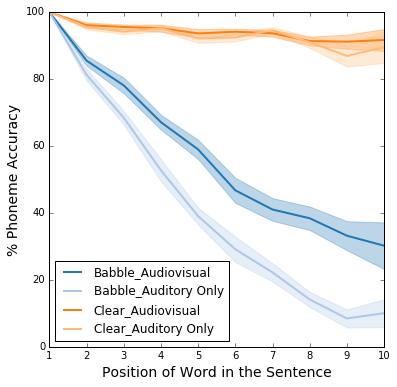

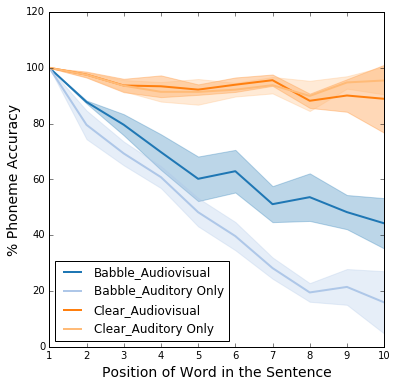

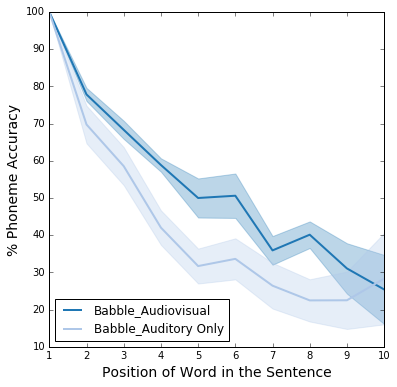

In [39]:
 for df_idx in [0,1,2]:
    df = dfs[df_idx]
    numSubs = len(df['Subject'].unique())
    data1 =  df[['SentenceCount','PhonemeHitBool','PhonemeCount','WordIdx']]
    data1 = data1[data1['WordIdx'] <= 1]
    firsts = data1[['SentenceCount','PhonemeHitBool']].groupby('SentenceCount').all().reset_index()
    firsts.rename(columns={'PhonemeHitBool':'FirstWordWasGood'}, inplace=True)
    data = pd.merge(df,firsts,how = 'outer',on ='SentenceCount')
    data = data[data['FirstWordWasGood'] == True]
    data = data[['VideoCond','SoundCond','PhonemeHitBool','Subject','WordIdx']].groupby(['WordIdx','VideoCond','SoundCond','Subject']).mean().reset_index()
    
    means = data[['WordIdx','VideoCond','SoundCond','PhonemeHitBool']].groupby(['WordIdx','VideoCond','SoundCond']).mean()['PhonemeHitBool'].unstack().unstack()
    errors = data[['WordIdx','VideoCond','SoundCond','PhonemeHitBool']].groupby(['WordIdx','VideoCond','SoundCond']).std()['PhonemeHitBool'].unstack().unstack()/np.sqrt(float(numSubs-1))
    means = means *100
    errors = errors*100
    def flattenHierarchicalCol(col,sep = '_'):
        if not type(col) is tuple:
            return col
        else:
            new_col = ''
            for leveli,level in enumerate(col):
                if not level == '':
                    if not leveli == 0:
                        new_col += sep
                    new_col += level
            return new_col

    means.columns = means.columns.map(flattenHierarchicalCol)
    errors.columns = errors.columns.map(flattenHierarchicalCol)
    strkeys = [str(x) for x in means.keys()]
    strkeys
    fig, ax = plt.subplots(figsize = (6,6))
    for x,y in enumerate(means.keys()):
        errorfill(means.index,means[y],errors[y],color = tableau20[x])
    ax.legend(loc='lower left')
    plt.ylabel('% Phoneme Accuracy')
    plt.xlabel('Position of Word in the Sentence')
    export_fig(fig_folder,'PhonACCByWordIdx4_'+ df_label[df_idx])
df = dfs[0]


In [106]:

from scipy.stats import linregress, ttest_1samp,pearsonr
fixedFactors = ['WordIdx','NumPhonemesInWord','SpeechdBRel','1LogGram','2LogGram','3LogGram']
data = data = df[df['SoundCond'] == 'Babble']
for var in fixedFactors:
    slopeBySubject = data[[var,'PhonemeHitBool','Subject']].groupby('Subject').apply(lambda v: linregress(v[var], v.PhonemeHitBool)[0])
    rBySubject = data[[var,'PhonemeHitBool','Subject']].groupby('Subject').apply(lambda v: pearsonr(v[var], v.PhonemeHitBool)[0])
    print var
    print ttest_1samp(slopeBySubject,0)
    print np.mean(slopeBySubject)
    print np.mean(rBySubject)

# df['PHBNorm'] = df['PhonemeHitBool'].apply(lambda x: 1 if x else 0)
# data = df[df['SoundCond'] == 'Clear']
# randomFactors = ['Subject']
# dependentMeasure = 'PHBNorm'
# data = data.iloc[1:100000,:]
# #data['PHBNorm'] = data.groupby(randomFactors).transform(lambda x: x-np.mean(x))['PHBNorm']
# #data['PHBNorm']
# # print df['PHBNorm']
# #fixedFactors = ['WordIdx','NumPhonemesInWord','SpeechdBRel']
# # fixedFactors = ['WordIdx']
# import statsmodels.api as sm 
# import statsmodels.formula.api as smf 
# # model = sm.MixedLM(data['PHBNorm'], data['WordIdx'], ['WordIdx','Subject'], exog_re=data['Subject'])
# # ols = sm.OLS(data[dependentMeasure], data[fixedFactors])
# # #ols = sm.OLS(data['PhonemeHitBool'], data[['WordIdx','1LogGram','2LogGram','3LogGram','PhonemeIndex','SpeechdBRel']])
# # result = ols.fit()
# # print result.summary()
# # # print data['PhonemeHitBool'].applymap(lambda x: 1 if x else 0)
# # print df['PHBNorm'] 
# # data = sm.datasets.get_rdataset("dietox", "geepack").data
# md = smf.mixedlm("PHBNorm ~ WordIdx", data[['PHBNorm','WordIdx','Subject']], groups=data["Subject"])
# md
# mdf = md.fit() 
# print(mdf.summary())

WordIdx
Ttest_1sampResult(statistic=-32.18609377496756, pvalue=1.2432778024418746e-20)
-0.0665155771711
-0.325839563829
NumPhonemesInWord
Ttest_1sampResult(statistic=-2.006427858689706, pvalue=0.056708044792254497)
-0.00493729178623
-0.0305305703808
SpeechdBRel
Ttest_1sampResult(statistic=28.109053118087417, pvalue=2.6012504100947789e-19)
0.00829640900418
0.151679340052
1LogGram
Ttest_1sampResult(statistic=9.1820233844189847, pvalue=3.7294099383847247e-09)
0.012902981305
0.0926531780314
2LogGram
Ttest_1sampResult(statistic=10.006567371003172, pvalue=7.5504979011297249e-10)
0.0120956499913
0.115993388326
3LogGram
Ttest_1sampResult(statistic=10.096318017282286, pvalue=6.3778230044904673e-10)
0.0184765588429
0.10563368028


Subject
1    -0.041252
2     0.027451
3     0.007461
4     0.027075
5    -0.081123
6    -0.040089
7     0.001386
8    -0.056024
9    -0.003488
10   -0.064306
11   -0.007414
12    0.075888
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
dtype: float64
Ttest_1sampResult(statistic=nan, pvalue=nan)
Subject
1         NaN
2         NaN
3   -0.049109
4   -0.016926
5   -0.068285
6   -0.043800
dtype: float64
Ttest_1sampResult(statistic=nan, pvalue=nan)
Subject
1    0.032530
2    0.013429
3    0.069129
4    0.009784
5    0.022160
6   -0.003203
dtype: float64
Ttest_1sampResult(statistic=2.3332572772874944, pvalue=0.066939337539102653)


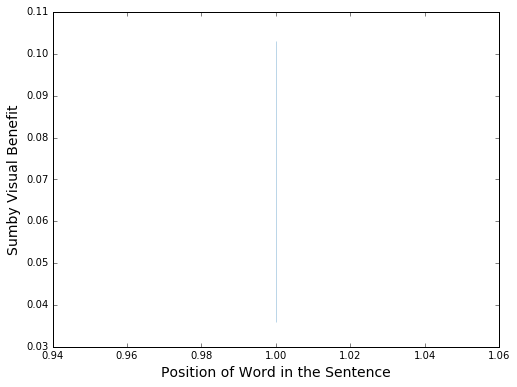

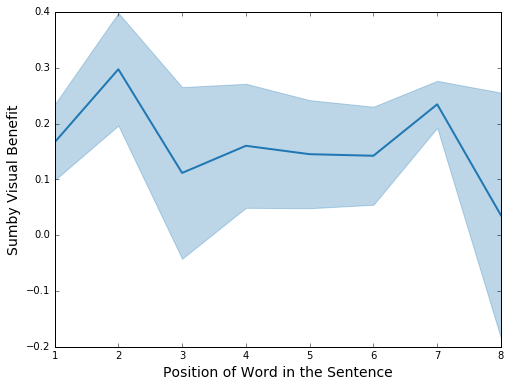

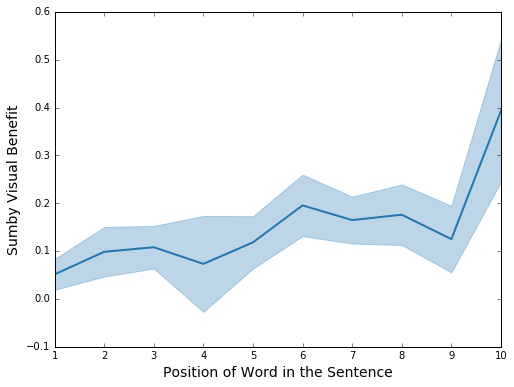

In [32]:
from scipy.stats import linregress, ttest_1samp
for df_idx in [0,1,2]:
    df = dfs[df_idx]
    numSubs = len(df['Subject'].unique())
    data1 =  df[['SentenceCount','PhonemeHitBool','PhonemeCount','WordIdx']]
    data1 = data1[data1['WordIdx'] <= 1]
    firsts = data1[['SentenceCount','PhonemeHitBool']].groupby('SentenceCount').all().reset_index()
    firsts.rename(columns={'PhonemeHitBool':'FirstWordWasGood'}, inplace=True)
    data = pd.merge(df,firsts,how = 'outer',on ='SentenceCount')
    data = data[data['FirstWordWasGood'] == False]
    data = data[['VideoCond','SoundCond','PhonemeHitBool','Subject','WordIdx']].groupby(['WordIdx','VideoCond','SoundCond','Subject']).mean().reset_index()
    data['InvertedPhonemeACC'] = 100-data['PhonemeHitBool']*100
    av = data.loc[data['VideoCond'] == 'Audiovisual',:].reset_index()
    ao = data.loc[data['VideoCond'] == 'Auditory Only',:].reset_index()
    av['SumbyRatio'] = ((ao['InvertedPhonemeACC']-av['InvertedPhonemeACC'])/ao['InvertedPhonemeACC'])
    av = av.loc[av['SoundCond'] == 'Babble',:]

    means = av[['WordIdx','SoundCond','SumbyRatio']].groupby(['WordIdx','SoundCond']).mean()['SumbyRatio'].unstack()
    errors = av[['WordIdx','SoundCond','SumbyRatio']].groupby(['WordIdx','SoundCond']).std()['SumbyRatio'].unstack()/np.sqrt(float(numSubs-1))
    means
    errors
    #sumbyRatio = data['InvertedPhonemeACC']
    # av = data.xs('Audiovisual',level = 1,axis=0)
    # ao = data.xs('Auditory Only',level = 1,axis=0)
    # means = data[['WordIdx','VideoCond','SoundCond','PhonemeHitBool']].groupby(['WordIdx','VideoCond','SoundCond']).mean()['PhonemeHitBool'].unstack().unstack()
    # errors = data[['WordIdx','VideoCond','SoundCond','PhonemeHitBool']].groupby(['WordIdx','VideoCond','SoundCond']).std()['PhonemeHitBool'].unstack().unstack()/np.sqrt(float(numSubs-1))
    # means = means *100
    # errors = errors*100

    means.columns = means.columns.map(flattenHierarchicalCol)
    errors.columns = errors.columns.map(flattenHierarchicalCol)
    strkeys = [str(x) for x in means.keys()]
    strkeys
    fig, ax = plt.subplots(figsize = (8,6))
    for x,y in enumerate(means.keys()):
        errorfill(means.index,means[y],errors[y],color = tableau20[x])
    plt.ylabel('Sumby Visual Benefit')
    plt.xlabel('Position of Word in the Sentence')
    #plt.title('Sumby Ratio over the Course of a Sentence')

    
    sumbySlopeBySubject = av[['WordIdx','SumbyRatio','Subject']].groupby('Subject').apply(lambda v: linregress(v.WordIdx, v.SumbyRatio)[0])
    print sumbySlopeBySubject
    sumbyMean = sumbySlopeBySubject.mean()
    # print sumbyMean
    print ttest_1samp(sumbySlopeBySubject,0)
    export_fig(fig_folder,'SumbyRatioByWordIdx_'+ df_label[df_idx])
df = dfs[0]

In [ ]:
def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = next(ax._get_lines.prop_cycler)['color']
    if np.isscalar(yerr) and yerr == 0:
        ymin = 0
        ymax = 0
    elif np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

In [ ]:
for df_idx in [0,1,2]:
    df = dfs[df_idx]
    numSubs = len(df['Subject'].unique())
    isNoisy = df['SoundCond'] == 'Babble'
    dfN = df[isNoisy]
    grouped= dfN[['PhonemeHitBool','WordIdx','NumWordsInSentence','Subject']].groupby(['WordIdx','NumWordsInSentence','Subject'])
    subMean = grouped.mean().reset_index()
    subMean
    subG =subMean[['PhonemeHitBool','WordIdx','NumWordsInSentence','Subject']].groupby(['WordIdx','NumWordsInSentence'])
    # means.columns = {'2','3','4','5','6','7','8','9','10'}
    # errors.columns = {'2','3','4','5','6','7','8','9','10'}
    means = subG.mean()['PhonemeHitBool'].unstack()*100
    errors = (subG.std()['PhonemeHitBool'].unstack()/np.sqrt(float(numSubs-1)))*100
    fig, ax = plt.subplots(figsize = (10,6))
    for x in means.keys():
        errorfill(means.index,means[x],errors[x],color = (0,(x-1)/9,1-(x-1)/9),alpha_fill=0.1)
    ax.legend(loc='upper right',title = 'Number of Words in the Sentence')
    plt.ylabel('% Phoneme Accuracy')
    plt.xlabel('Position of Word in the Sentence')
    export_fig(fig_folder,'PhoneACCByPosByNumWords'+ df_label[df_idx])
df = dfs[0]

In [ ]:
import math
def amp2db(scalar):
    return 20 * math.log10(scalar)

df['SpeechdB'] =  df['SpeechRMS'].apply(lambda x: amp2db(x) if x >=0 else 0)
df['SpeechdBRel'] = df[['SpeechdB','SentenceCount']].groupby('SentenceCount').apply(lambda x: x-np.mean(x))['SpeechdB']
isNoisy = df['SoundCond'] == 'Babble'
dfN = df[isNoisy]
fig, ax = plt.subplots(figsize = (10,6))
means = dfN[['SpeechdBRel','WordIdx','NumWordsInSentence']].groupby(['WordIdx','NumWordsInSentence']).mean().unstack()
means.columns = means.columns.droplevel()
errors = 0          
for x in means.keys():
    errorfill(means.index,means[x],errors,color = (0,(x-1)/9,1-(x-1)/9),alpha_fill=0.1)
ax.legend(loc='upper right',title='Number of Words in the Sentence')
plt.ylabel('Phoneme Volume (dB)')
plt.xlabel('Number of Words in the Sentence')
export_fig(fig_folder,'VolumeByPosByNumWords')

In [ ]:
from scipy.stats import linregress, ttest_1samp
plt.figure(figsize = (12,8)) 
for df_idx in [0,1,2]:
    df = dfs[df_idx]
    numSubs = len(df['Subject'].unique())
    data = df[['VideoCond','SoundCond','PhonemeHitBool','Subject','WordIdx']].groupby(['WordIdx','VideoCond','SoundCond','Subject']).mean().reset_index()
    #data = data.loc[data['VideoCond'] == 'Auditory Only',:]

    means = data[['WordIdx','SoundCond','PhonemeHitBool']].groupby(['WordIdx','SoundCond']).mean()['PhonemeHitBool'].unstack()
    errors = data[['WordIdx','SoundCond','PhonemeHitBool']].groupby(['WordIdx','SoundCond']).std()['PhonemeHitBool'].unstack()/np.sqrt(float(numSubs-1))
    means
    errors
    errorfill(means.index,means['Babble'],errors['Babble'],color = tableau20[df_idx+6])
    plt.ylabel('Phoneme Accuracy (%)')
    plt.xlabel('Position of Word in the Sentence')
    #plt.title('Sumby Ratio over the Course of a Sentence')
    accSlopeBySubject = data[['WordIdx','PhonemeHitBool','Subject','SoundCond']].groupby(['Subject','SoundCond']).apply(lambda v: linregress(v.WordIdx, v.PhonemeHitBool)[0])
    #print accSlopeBySubject
    accMean = accSlopeBySubject.unstack().mean()
    print accMean
    print ttest_1samp(accSlopeBySubject.unstack(),0)
plt.legend(['Main: Babble','Control: Babble Shaped Noise','Control: Flattened Volume Speech'])
export_fig(fig_folder,'PhonACCByWordIdxBabbleCollapsed')
df = dfs[0]

In [ ]:
from scipy.stats import linregress, ttest_1samp
plt.figure(figsize = (12,8)) 
for df_idx in [0]:
    df = dfs[df_idx]
    numSubs = len(df['Subject'].unique())
    data = df[['VideoCond','SoundCond','PhonemeHitBool','Subject','WordIdx']].groupby(['WordIdx','VideoCond','SoundCond','Subject']).mean().reset_index()
#    data = data.loc[data['VideoCond'] == 'Auditory Only',:]
    data = data.loc[data['SoundCond'] == 'Babble',:]

    means = data[['WordIdx','VideoCond','PhonemeHitBool']].groupby(['WordIdx','VideoCond']).mean()['PhonemeHitBool'].unstack()
    errors = data[['WordIdx','VideoCond','PhonemeHitBool']].groupby(['WordIdx','VideoCond']).std()['PhonemeHitBool'].unstack()/np.sqrt(float(numSubs-1))
    means
    errors
    for c, cond in enumerate(['Audiovisual','Auditory Only']):
        errorfill(means.index,means[cond],errors[cond],color = tableau20[c+6])
        plt.ylabel('Phoneme Accuracy (%)')
        plt.xlabel('Position of Word in the Sentence')
        #plt.title('Sumby Ratio over the Course of a Sentence')
    accSlopeBySubject = data[['WordIdx','PhonemeHitBool','Subject','VideoCond']].groupby(['Subject','VideoCond']).apply(lambda v: linregress(v.WordIdx, v.PhonemeHitBool)[0])
    #print accSlopeBySubject
    accMean = accSlopeBySubject.unstack().mean()
    print accMean
    print ttest_1samp(accSlopeBySubject.unstack(),0)
    print ttest_1samp(accSlopeBySubject.unstack()['Audiovisual']-accSlopeBySubject.unstack()['Auditory Only'],0)
plt.legend(['Babble Audiovisual','Babble Auditory Only'])
export_fig(fig_folder,'PhonACCByWordIdxBabbleCollapsed')
df = dfs[0]

In [ ]:
accSlopeBySubject = data[['WordIdx','PhonemeHitBool','Subject','SoundCond']].groupby(['Subject','SoundCond']).apply(lambda v: linregress(v.WordIdx, v.PhonemeHitBool)[0])
ttest_1samp(accSlopeBySubject.unstack(),0)

In [ ]:
data = df[['VideoCond','SoundCond','PhonemeHitBool','TargetPhoneme']].groupby(['TargetPhoneme','VideoCond','SoundCond']).mean().reset_index()
data['InvertedPhonemeACC'] = 100-data['PhonemeHitBool']*100
data = data.loc[data['SoundCond'] == 'Babble',:]
av = data.loc[data['VideoCond'] == 'Audiovisual',:].reset_index()
ao = data.loc[data['VideoCond'] == 'Auditory Only',:].reset_index()
aoByPhonemes = ao[['TargetPhoneme','SoundCond','PhonemeHitBool']].groupby(['TargetPhoneme','SoundCond']).mean()['PhonemeHitBool'].unstack()['Babble']*100
aoByPhonemes.name = 'aoBabbleHitRate'
avByPhonemes = av[['TargetPhoneme','SoundCond','PhonemeHitBool']].groupby(['TargetPhoneme','SoundCond']).mean()['PhonemeHitBool'].unstack()['Babble']*100
avByPhonemes.name = 'avBabbleHitRate'
av['SumbyRatio'] = ((ao['InvertedPhonemeACC']-av['InvertedPhonemeACC'])/ao['InvertedPhonemeACC'])

sumbyByPhonemes = av[['TargetPhoneme','SoundCond','SumbyRatio']].groupby(['TargetPhoneme','SoundCond']).mean()['SumbyRatio'].unstack()['Babble']
sumbyByPhonemes.name = 'SumbyRatio'
# data.columns = ['AV','AO','SumbyRatio']
means = sumbyByPhonemes.sort_values(ascending = False)
ax = means.plot(kind = 'bar',figsize=(10,6))
ax.set_ylabel('Sumby Visual Benefit')
ax.set_xlabel('Phoneme')
export_fig(fig_folder,'BabbleSumbyByPhoneme')
#print sumbyByPhonemes

In [ ]:
import os
dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme_r5.xlsx'),encoding='latin-1')
#dfPT.reset_index('CMUPhonemes)')
sumbyRank = sumbyByPhonemes.rank(ascending = False)
sumbyRank.name = 'SumbyRank'
sumbyDF = pd.concat([aoByPhonemes,avByPhonemes,sumbyByPhonemes,  sumbyRank],axis=1).reset_index()
sumbyDF.keys()
#dfPT
joined = pd.merge(dfPT, sumbyDF, how='inner', left_on = 'CMU Phonemes',right_on = 'TargetPhoneme'  )
joined = joined.set_index('CMU Phonemes')
joined.to_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhonemeWithData.csv'),encoding='utf-8')
#joined
dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhonemeWithData.csv'),encoding='utf-8')
#dfPT
#joined = dfPT.join(sumbyByPhonemes,how = 'outer','LeftKeys','CMUPhonemes','RightKeys','TargetPhoneme')

In [ ]:
def normdata(series):
    return (series-min(series))/(max(series)-min(series))

In [ ]:
dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhonemeWithData.csv'),encoding='utf-8')
#dfPT = dfPT[dfPT['Phon Type (American IPA)'] == 'Consonant']



from bokeh.models import HoverTool, ColumnDataSource,CustomJS, ColorBar, LinearColorMapper, FixedTicker
from bokeh.plotting import figure, show, output_file
import pandas as pd
import os
import math
from bokeh.io import output_notebook,vform,push_notebook
global source
from bokeh.palettes import Greens9 as palette
output_notebook()

source = ColumnDataSource(
    data=dict(
        xaxis=[str(x) for x in dfPT['AdrianXCoord']],
        yaxis=[str(y) for y in dfPT['AdrianYCoord']],
        cmu=[str(s) for s in dfPT.index],
        #type=[str(x) for x in cmap],
        sym=[x for x in dfPT['IPA symbol']],
        jrank=[x for x in dfPT['Jeffers Visibility Rank']],
        mpcrank=[x for x in dfPT['MPC Rank']],
        audioOnlyHitRate =[x for x in dfPT['aoBabbleHitRate']], 
        audioVisualHitRate =[x for x in dfPT['avBabbleHitRate']], 
        sumbyratio=[x for x in dfPT['SumbyRatio']],
        sumbyrank=[x for x in dfPT['SumbyRank']],
        example=[x for x in dfPT['CMU Examples']],   
        #type_color = ['#%02x%02x%02x' % (0,0,0) if math.isnan(x) else '#%02x%02x%02x' % (x*255,255-(x*255),0) for x in cmap] #Must be hexadecima
    )
)

title = 'Sumby Visual Benefit Map'
p = figure(title=title, tools="hover,save")
p.axis.visible = False      
# p = figure(title=title, tools="hover,save")
p.plot_width = 1200
#p.toolbar_location = None
p.outline_line_color = None
palette = palette[::-1]
color_mapper = LinearColorMapper(palette = palette, low=.2, high=.4)

p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
       fill_alpha=0.6, fill_color={'field': 'sumbyratio', 'transform': color_mapper})



#p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
#       fill_alpha=0.6)

text_props = {
    "source": source,
    "angle": 0,
    "color": "black",
    "text_align": "left",
    "text_baseline": "middle"
}

p.text(x="xaxis", y="yaxis", text="sym",
       text_font_style="bold", text_font_size="15pt", **text_props)



p.grid.grid_line_color = None

p.select_one(HoverTool).tooltips = [
    ("cmu", "@cmu"),
    ("example", "@example"),
    ("jrank","@jrank"),
    ("mpcrank","@mpcrank"),
    ("sumbyratio","@sumbyratio"),
    ("sumbyrank","@sumbyrank"),
    ("audioOnlyHitRate","@audioOnlyHitRate"),
    ("audioVisualHitRate","@audioVisualHitRate")
]


color_bar = ColorBar(color_mapper=color_mapper, orientation='horizontal',
                     location='top_right', scale_alpha=0.6,
                     ticker=FixedTicker(ticks=[.2,.4]))
p.add_layout(color_bar)

output_file('C:\Experiments\JK302\Figures\SumbyRatio.html', title='Sumby Rank Map')
show(p) 

In [ ]:
title = 'Jeffers Rank Map'
p = figure(title=title, tools="hover,save")
p.axis.visible = False      
# p = figure(title=title, tools="hover,save")
p.plot_width = 1200
#p.toolbar_location = None
p.outline_line_color = None
palette = palette[::-1]
color_mapper = LinearColorMapper(palette = palette, low=1, high=12)

p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
       fill_alpha=0.6, fill_color={'field': 'jrank', 'transform': color_mapper})



#p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
#       fill_alpha=0.6)

text_props = {
    "source": source,
    "angle": 0,
    "color": "black",
    "text_align": "left",
    "text_baseline": "middle"
}

p.text(x="xaxis", y="yaxis", text="sym",
       text_font_style="bold", text_font_size="15pt", **text_props)



p.grid.grid_line_color = None

p.select_one(HoverTool).tooltips = [
    ("cmu", "@cmu"),
    ("example", "@example"),
    ("jrank","@jrank"),
    ("mpcrank","@mpcrank"),
    ("sumbyratio","@sumbyratio"),
    ("sumbyrank","@sumbyrank"),
    ("audioOnlyHitRate","@audioOnlyHitRate"),
    ("audioVisualHitRate","@audioVisualHitRate")
]


color_bar = ColorBar(color_mapper=color_mapper, orientation='horizontal',
                     location='top_right', scale_alpha=0.6,
                     ticker=FixedTicker(ticks=[1,12]))
p.add_layout(color_bar)

output_file('C:\Experiments\JK302\Figures\JeffersRank.html', title='Jeffers Rank Map')
show(p) 

title = 'Auditory Only Performance'
p = figure(title=title, tools="hover,save")
p.axis.visible = False      
# p = figure(title=title, tools="hover,save")
p.plot_width = 1200
#p.toolbar_location = None
p.outline_line_color = None
palette = palette[::-1]
color_mapper = LinearColorMapper(palette = palette, low=30, high=60)

p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
       fill_alpha=0.6, fill_color={'field': 'audioOnlyHitRate', 'transform': color_mapper})



#p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
#       fill_alpha=0.6)

text_props = {
    "source": source,
    "angle": 0,
    "color": "black",
    "text_align": "left",
    "text_baseline": "middle"
}

p.text(x="xaxis", y="yaxis", text="sym",
       text_font_style="bold", text_font_size="15pt", **text_props)



p.grid.grid_line_color = None

p.select_one(HoverTool).tooltips = [
    ("cmu", "@cmu"),
    ("example", "@example"),
    ("jrank","@jrank"),
    ("mpcrank","@mpcrank"),
    ("sumbyratio","@sumbyratio"),
    ("sumbyrank","@sumbyrank"),
    ("audioOnlyHitRate","@audioOnlyHitRate"),
    ("audioVisualHitRate","@audioVisualHitRate")
]


color_bar = ColorBar(color_mapper=color_mapper, orientation='horizontal',
                     location='top_right', scale_alpha=0.6,
                     ticker=FixedTicker(ticks=[30,60]))
p.add_layout(color_bar)

output_file('C:\Experiments\JK302\Figures\AuditoryOnly.html', title='Auditory Only Map')
show(p) 

title = 'AudioVisual Performance'
p = figure(title=title, tools="hover,save")
p.axis.visible = False      
# p = figure(title=title, tools="hover,save")
p.plot_width = 1200
#p.toolbar_location = None
p.outline_line_color = None
color_mapper = LinearColorMapper(palette = palette, low=30, high=60)

p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
       fill_alpha=0.6, fill_color={'field': 'audioVisualHitRate', 'transform': color_mapper})



#p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
#       fill_alpha=0.6)

text_props = {
    "source": source,
    "angle": 0,
    "color": "black",
    "text_align": "left",
    "text_baseline": "middle"
}

p.text(x="xaxis", y="yaxis", text="sym",
       text_font_style="bold", text_font_size="15pt", **text_props)



p.grid.grid_line_color = None

p.select_one(HoverTool).tooltips = [
    ("cmu", "@cmu"),
    ("example", "@example"),
    ("jrank","@jrank"),
    ("mpcrank","@mpcrank"),
    ("sumbyratio","@sumbyratio"),
    ("sumbyrank","@sumbyrank"),
    ("audioOnlyHitRate","@audioOnlyHitRate"),
    ("audioVisualHitRate","@audioVisualHitRate")
]


color_bar = ColorBar(color_mapper=color_mapper, orientation='horizontal',
                     location='top_right', scale_alpha=0.6,
                     ticker=FixedTicker(ticks=[30,60]))
p.add_layout(color_bar)

output_file('C:\Experiments\JK302\Figures\Audiovisual.html', title='Audiovisual Map')
show(p) 

Here it is! Use the drop down menu below to select the coloring scheme for the phonetic chart.

We can also look at the map for the clear data

In [ ]:
#Add multiple linear regression with roundedness?, volume?
placeLabels = ['','Bilabial','Labio-dental','Lingua-dental','Lingua-aveolar','Lingua-palatal','Lingua-velar','Glottal','']
data = df[['VideoCond','SoundCond','PhonemeHitBool','Subject','Consonant Position']].groupby(['Consonant Position','VideoCond','Subject','SoundCond']).mean().reset_index()
data['InvertedCPositionACC'] = 100-data['PhonemeHitBool']*100
av = data.loc[data['VideoCond'] == 'Audiovisual',:].reset_index()
ao = data.loc[data['VideoCond'] == 'Auditory Only',:].reset_index()
av['SumbyRatio'] = ((ao['InvertedCPositionACC']-av['InvertedCPositionACC'])/ao['InvertedCPositionACC'])
av = av.loc[av['SoundCond'] == 'Babble',:]
av = av[av['Consonant Position'] > 0]
# sumbyByCPosition = av[['Consonant Position','SoundCond','SumbyRatio']].groupby(['Consonant Position','SoundCond']).mean()['SumbyRatio'].unstack()['Babble']
# sumbyByCPosition.name = 'SumbyRatio'
# sumbyByCPosition

means = av[['Consonant Position','SoundCond','SumbyRatio']].groupby(['Consonant Position','SoundCond']).mean()['SumbyRatio'].unstack()['Babble']
errors = av[['Consonant Position','SoundCond','SumbyRatio']].groupby(['Consonant Position','SoundCond']).std()['SumbyRatio'].unstack()['Babble']/np.sqrt(float(numSubs-1))
means
errors 
ax = means.plot(kind = 'line',yerr= errors,figsize=(12,8))

from scipy.stats import linregress, pearsonr
sumbySlopeBySubject = av[['Consonant Position','SumbyRatio','Subject']].groupby('Subject').apply(lambda v: linregress(v['Consonant Position'], v.SumbyRatio)[0])
#print sumbySlopeBySubject
sumbyMean = sumbySlopeBySubject.mean()
print sumbyMean
print ttest_1samp(sumbySlopeBySubject,0)
print ttest_1samp(sumbySlopeBySubject,0)


dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhonemeWithData.csv'),encoding='utf-8')
dfPT = dfPT[dfPT['Phon Type (American IPA)'].isin(['Consonant','Special'])]
z = dfPT['Consonant Position']
y = dfPT['SumbyRatio']
n = dfPT.index
#fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(z, y,alpha=0.0)
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i]+.1,y[i]))
plt.xticks([0,1,2,3,4,5,6,7,8],placeLabels)
plt.ylabel('Sumby Visual Benefit')
plt.xlabel('Place of Articulation')
export_fig(fig_folder,'SumbyVsPlace')
r, pval = pearsonr(z,y)
print 'Pearson R-squared ' + str(r**2) + ' ' + str(pval)


In [ ]:
placeLabels = [x for x in ' ABCDEFGHIJK? ']
data = df[['VideoCond','SoundCond','PhonemeHitBool','Subject','Jeffers Visibility Rank','Phon Type (American IPA)']] 
data = data[data['Jeffers Visibility Rank'] > 0]
data = data[data['Phon Type (American IPA)'].isin(['Consonant','Special'])]
data = data[['VideoCond','SoundCond','PhonemeHitBool','Subject','Jeffers Visibility Rank']].groupby(['Jeffers Visibility Rank','VideoCond','Subject','SoundCond']).mean().reset_index()
data['Inverted'] = 100-data['PhonemeHitBool']*100
av = data.loc[data['VideoCond'] == 'Audiovisual',:].reset_index()
ao = data.loc[data['VideoCond'] == 'Auditory Only',:].reset_index()
av['SumbyRatio'] = ((ao['Inverted']-av['Inverted'])/ao['Inverted'])
av = av.loc[av['SoundCond'] == 'Babble',:]

# sumbyByCPosition = av[['Consonant Position','SoundCond','SumbyRatio']].groupby(['Consonant Position','SoundCond']).mean()['SumbyRatio'].unstack()['Babble']
# sumbyByCPosition.name = 'SumbyRatio'
# sumbyByCPosition

means = av[['Jeffers Visibility Rank','SoundCond','SumbyRatio']].groupby(['Jeffers Visibility Rank','SoundCond']).mean()['SumbyRatio'].unstack()['Babble']
errors = av[['Jeffers Visibility Rank','SoundCond','SumbyRatio']].groupby(['Jeffers Visibility Rank','SoundCond']).std()['SumbyRatio'].unstack()['Babble']/np.sqrt(float(numSubs-1))
means
errors 
ax = means.plot(kind = 'line',yerr= errors,figsize=(12,8))

from scipy.stats import linregress,pearsonr,ttest_1samp
sumbySlopeBySubject = av[['Jeffers Visibility Rank','SumbyRatio','Subject']].groupby('Subject').apply(lambda v: linregress(v['Jeffers Visibility Rank'], v.SumbyRatio)[0])
#print sumbySlopeBySubject
sumbyMean = sumbySlopeBySubject.mean()
print sumbyMean
print ttest_1samp(sumbySlopeBySubject,0)


dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhonemeWithData.csv'),encoding='utf-8')
dfPT = dfPT[dfPT['Phon Type (American IPA)'].isin(['Consonant','Special'])]
z = dfPT['Jeffers Visibility Rank']
y = dfPT['SumbyRatio']
n = dfPT.index
#fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(z, y,alpha=0.0)
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i]+.1,y[i]))
plt.xticks(np.arange(0,14),placeLabels)
plt.ylabel('Sumby Visual Benefit')
plt.xlabel('Jeffers Visibility Rank')
export_fig(fig_folder,'SumbyVsJeffers')
r, pval = pearsonr(z,y)
print 'Pearson R-squared ' + str(r**2) + ' ' + str(pval)

## Supplementary Materials

In [ ]:
df['RelCut'] = pd.cut(df['SpeechdBRel'],5,labels = False)
data = df[['VideoCond','SoundCond','PhonemeHitBool','Subject','RelCut','Phon Type (American IPA)']] 
data = data[data['RelCut'] > 0]
#data = data[data['Phon Type (American IPA)'].isin(['Consonant','Special'])]
data = data[['VideoCond','SoundCond','PhonemeHitBool','Subject','RelCut']].groupby(['RelCut','VideoCond','Subject','SoundCond']).mean().reset_index()
data['Inverted'] = 100-data['PhonemeHitBool']*100
av = data.loc[data['VideoCond'] == 'Audiovisual',:].reset_index()
ao = data.loc[data['VideoCond'] == 'Auditory Only',:].reset_index()
av['SumbyRatio'] = ((ao['Inverted']-av['Inverted'])/ao['Inverted'])
av = av.loc[av['SoundCond'] == 'Babble',:]



dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhonemeWithData.csv'),encoding='utf-8')
dfPT['RelByPhoneme'] =  df[['TargetPhoneme','SpeechdBRel']].groupby('TargetPhoneme').mean() 
#dfPT = dfPT[dfPT['Phon Type (American IPA)'].isin(['Consonant','Special'])]
z = dfPT['RelByPhoneme']
y = dfPT['SumbyRatio']
# print y
# print z
# z.index = y.index
n = dfPT.index
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(z, y,alpha=0)
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i]+.1,y[i]))
# plt.xticks(np.arange(0,14),placeLabels)
plt.ylabel('Sumby Ratio')
plt.xlabel('Normed Volume (dB)')
export_fig(fig_folder,'SumbyVsSpeechdBRel')
r, pval = pearsonr(z,y)
print 'Pearson R-squared ' + str(r**2) + ' ' + str(pval)

dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhonemeWithData.csv'),encoding='utf-8')
dfPT['RelByPhoneme'] =  df[['TargetPhoneme','SpeechdBRel']].groupby('TargetPhoneme').mean() 
#dfPT = dfPT[dfPT['Phon Type (American IPA)'].isin(['Consonant','Special'])]
z = dfPT['RelByPhoneme']
y = dfPT['aoBabbleHitRate']
# print y
# print z
# z.index = y.index
n = dfPT.index
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(z, y,alpha=0)
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i]+.1,y[i]))
# plt.xticks(np.arange(0,14),placeLabels)
plt.ylabel('Auditory Only Babble Hit Rate')
plt.xlabel('Normed Volume (dB)')
export_fig(fig_folder,'AOnlyVsSpeechdBRel')
r, pval = pearsonr(z,y)
print 'Pearson R-squared ' + str(r**2) + ' ' + str(pval)

In [ ]:
#data = df[['WordACC','WordIdx','WordCount','VideoCond','SoundCond','Subject']].groupby(['VideoCond','SoundCond','WordCount']).mean()
#data = data.loc[data['Subject'] <13,:]
#data = data.reset_index().groupby(['WordIdx','VideoCond','SoundCond']).mean().unstack().unstack()['WordACC']
data = df.groupby(['WordFromLast','VideoCond','SoundCond']).mean().unstack().unstack()['WordACC']
ax = data.plot(kind ='line',figsize=(7,7),color = [tableau20[x] for x in [0,1,2,3]])
ax.legend(loc='best')
ax.set_ylabel('Word Accuracy')
ax.set_xlabel('Word Position Back From Last Word')
hide_spines()

In [ ]:
ax = dfN[['PhonemeHitBool','TargetPhoneme']].groupby(['TargetPhoneme']).mean().unstack().plot(kind='bar',figsize=(12,4))

In [ ]:
data = df.loc[df['SoundCond'] =='Babble',:]

#Only look at partially correct words
a= data['AllPhonsMatch'] == False 
b = data['AllPhonsMiss'] == False
boolIdx =a&b 
data = data.loc[boolIdx,:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).mean()
data = data.unstack()
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='lower right')
ax.set_ylabel('Noisy Percent Correct')
avNoisyPHit = data['PhonemeHitBool','Audiovisual']
aoNoisyPHit = data['PhonemeHitBool','Auditory Only']
plt.figure()
dif = avNoisyPHit-aoNoisyPHit
ax = dif.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='lower right')
ax.set_ylabel('Noisy Percent Correct AV advantage')

In [ ]:
data = df[['VideoCond','SoundCond','PhonemeHitBool','Subject','TargetPhoneme']].groupby(['TargetPhoneme','VideoCond','SoundCond','Subject']).mean().reset_index()
data['InvertedPhonemeACC'] = 100-data['PhonemeHitBool']*100
av = data.loc[data['VideoCond'] == 'Audiovisual',:].reset_index()
ao = data.loc[data['VideoCond'] == 'Auditory Only',:].reset_index()
av['SumbyRatio'] = ((ao['InvertedPhonemeACC']-av['InvertedPhonemeACC'])/ao['InvertedPhonemeACC'])
av = av.loc[av['SoundCond'] == 'Babble',:]
av
means = av[['TargetPhoneme','SoundCond','SumbyRatio']].groupby(['TargetPhoneme','SoundCond']).mean()['SumbyRatio'].unstack()
errors = av[['TargetPhoneme','SoundCond','SumbyRatio']].groupby(['TargetPhoneme','SoundCond']).std()['SumbyRatio'].unstack()/np.sqrt(float(numSubs-1))
means
errors
# data.columns = ['AV','AO','SumbyRatio']
means = means.sort_values('Babble',ascending = False)
means
ax = means.plot(kind = 'bar',yerr= errors,figsize=(8,6))
ax.set_ylabel('Sumby Ratio')



In [ ]:
data = df.loc[df['SoundCond'] =='Babble',:]
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]
counts = data['TargetPhoneme'].value_counts()
#data = data['TargetPhoneme'].groupby(['TargetPhoneme']).count()
# data
relfreq = counts/sum(counts)*100
relfreq = relfreq.sort_values(ascending = False)
ax = relfreq.plot(kind = 'bar',figsize=(8,6))
ax.set_ylabel('Relative Frequency in Data Set (%)')
ax.set_xlabel('Phoneme')
# #data/float(90)/float(24)*135


In [ ]:
data = df.loc[df['SoundCond'] =='Babble',:]
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]
acc = data[['PhonemeHitBool','TargetPhoneme','Subject']].groupby(['Subject','TargetPhoneme']).mean().unstack()['PhonemeHitBool']
means = acc.mean()*100
errors = acc.std()/np.sqrt(float(numSubs-1))*100
means = means.sort_values(ascending = False)
means
ax = means.plot(kind = 'bar',yerr= errors,figsize=(8,6))
ax.set_ylabel('Overall Accuracy in Babble (%)')
ax.set_xlabel('Phoneme')
# #data/float(90)/float(24)*135


In [ ]:
#Instances by word position in sentence
data = df[['PhonemeHitBool','WordIdx','WordCount']].groupby('WordCount').mean().groupby('WordIdx').count()
ax = data.plot(kind='line',figsize=(8,4),color = tableau20[0],legend = None )
ax.set_title('Words per Word Position')
ax.set_xlabel('Nth Word')
ax.set_ylabel('Count')
hide_spines()


In [ ]:
data = df[['NumWordsInSentence','SentenceCount']].groupby('NumWordsInSentence').count()
ax = data.plot(kind = 'line',figsize= (8,4),legend = None)
ax.set_ylabel('Count')

data = df[['NumWordsInSentence','SentenceCount']].groupby('NumWordsInSentence').count().cumsum()
ax = data.plot(kind = 'line',figsize= (8,4),legend = None)
ax.set_ylabel('Cumulative Count')

In [ ]:
#Average acc
ax = df[['PhonemeHitBool','Talker','Subject']][df['SoundCond'] == 'Babble'].groupby('Subject').mean().plot(kind = 'bar',figsize=(8,4),legend = None)
ax.set_ylabel('Mean Accuracy')

In [ ]:
data = df[['PhonemeHitBool','TrialOrder']][df['SoundCond'] == 'Babble'].groupby('TrialOrder').mean()
data.plot(kind = 'line',figsize=(8,4),legend = None)
ax.set_ylabel('Mean Accuracy')

#From Dan Allen
import statsmodels.api as sm
def fit_line2(x, y):
    """Return slope, intercept of best fit line."""
    X = sm.add_constant(x)
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0] # could also return stderr in each via fit.bse
x = data.index
y = data.values
m, b = fit_line2(x,y)
N = 100 # could be just 2 if you are only drawing a straight line...
points = np.linspace(x.min(), x.max(), N)
plt.plot(points, m*points + b)


In [ ]:
placeLabels = ['','Bilabial','Labio-dental','Lingua-dental','Lingua-aveolar','Lingua-palatal','Lingua-velar','Glottal','']
data = df[['VideoCond','SoundCond','PhonemeHitBool','Subject','Consonant Position']].groupby(['Consonant Position','VideoCond','Subject','SoundCond']).mean().reset_index()
data = data.loc[data['SoundCond'] == 'Babble',:]
data = data[data['Consonant Position'] > 0]
# sumbyByCPosition = av[['Consonant Position','SoundCond','SumbyRatio']].groupby(['Consonant Position','SoundCond']).mean()['SumbyRatio'].unstack()['Babble']
# sumbyByCPosition.name = 'SumbyRatio'
# sumbyByCPosition

means = data[['Consonant Position','SoundCond','PhonemeHitBool']].groupby(['Consonant Position','SoundCond']).mean()['PhonemeHitBool'].unstack()['Babble']
errors = data[['Consonant Position','SoundCond','PhonemeHitBool']].groupby(['Consonant Position','SoundCond']).std()['PhonemeHitBool'].unstack()['Babble']/np.sqrt(float(numSubs-1))
means
errors 
ax = means.plot(kind = 'line',yerr= errors,figsize=(12,8))

from scipy.stats import linregress
sumbySlopeBySubject = data[['Consonant Position','PhonemeHitBool','Subject']].groupby('Subject').apply(lambda v: linregress(v['Consonant Position'], v.PhonemeHitBool)[0])
print sumbySlopeBySubject
sumbyMean = sumbySlopeBySubject.mean()
print sumbyMean
print ttest_1samp(sumbySlopeBySubject,0)


# dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhonemeWithData.csv'),encoding='utf-8')
# dfPT = dfPT[dfPT['Phon Type (American IPA)'].isin(['Consonant','Special'])]
# z = dfPT['Consonant Position']
# y = dfPT['PhonemeHitBool']
# n = dfPT.index
# #fig, ax = plt.subplots(figsize = (12,8))
# ax.scatter(z, y,alpha=0.0)
# for i, txt in enumerate(n):
#     ax.annotate(txt, (z[i]+.1,y[i]))
# plt.xticks([0,1,2,3,4,5,6,7,8],placeLabels)
# plt.ylabel('PhonemeHitBool')
# plt.xlabel('Place of Articulation')
# r, pval = pearsonr(z,y)
# print 'Pearson R-squared ' + str(r**2) + ' ' + str(pval)


In [ ]:
#Average acc
ax = df[['PhonemeHitBool','VideoCond','UPOS']][df['SoundCond'] == 'Babble'].groupby(['UPOS','VideoCond']).mean().unstack().plot(kind = 'bar',figsize=(8,4))
ax.set_ylabel('Mean Accuracy')
plt.figure()
# df['wordIdxNormedPHB'] = df['PhonemeHitBool']
df['wordIdxNormedPHB'] = df[['PhonemeHitBool','VideoCond','WordIdx']][df['SoundCond'] == 'Babble'].groupby(['WordIdx','VideoCond']).transform(lambda x: x-np.mean(x))
df['wordIdxNormedPHB'] = df['PhonemeHitBool']-df['wordIdxNormedPHB']
data = df.loc[df['UPOS'].isin(['ADJ','ADP','ADV','DET','NOUN','PRON','VERB'])]
data = data[data['SoundCond'] == 'Babble']

data = data[['wordIdxNormedPHB','Subject','UPOS']].groupby(['UPOS','Subject']).mean().reset_index()
data = data.loc[data['UPOS'].isin(['ADJ','ADP','ADV','DET','NOUN','PRON','VERB'])]
data
means = data[['UPOS','wordIdxNormedPHB']].groupby(['UPOS']).mean()['wordIdxNormedPHB']
errors = data[['UPOS','wordIdxNormedPHB']].groupby(['UPOS']).std()['wordIdxNormedPHB']/np.sqrt(float(numSubs-1))
means = means.sort_index(ascending = True)
means
plt.figure()
ax = means.plot(kind = 'bar',yerr=errors,figsize=(8,4))
ax.set_ylabel('Phoneme Accuracy (%)')
ax.set_xlabel('Part of Speech')

data = df[['VideoCond','SoundCond','wordIdxNormedPHB','Subject','UPOS']].groupby(['UPOS','VideoCond','SoundCond','Subject']).mean().reset_index()
data['InvertedPhonemeACC'] = 100-data['wordIdxNormedPHB']*100
av = data.loc[data['VideoCond'] == 'Audiovisual',:].reset_index()
ao = data.loc[data['VideoCond'] == 'Auditory Only',:].reset_index()
av['SumbyRatio'] = ((ao['InvertedPhonemeACC']-av['InvertedPhonemeACC'])/ao['InvertedPhonemeACC'])
av = av.loc[av['SoundCond'] == 'Babble',:]
av = av.loc[av['UPOS'].isin(['ADJ','ADP','ADV','DET','NOUN','PRON','VERB'])]
means = av[['UPOS','SoundCond','SumbyRatio']].groupby(['UPOS','SoundCond']).mean()['SumbyRatio'].unstack()
errors = av[['UPOS','SoundCond','SumbyRatio']].groupby(['UPOS','SoundCond']).std()['SumbyRatio'].unstack()/np.sqrt(float(numSubs-1))
means
errors

means = means.sort_index(ascending = True)
plt.figure()
ax = means.plot(kind = 'bar',yerr=errors,figsize=(8,4))
ax.set_ylabel('Visual Benefit')
ax.set_xlabel('Part of Speech')

In [ ]:
from __future__ import division
numSubs = 24
sqrtNmin1 = np.sqrt(numSubs-1)
data = df.loc[df['SoundCond'] =='Babble',:]
videoByBabbleAV = data[['UPOS','PhonemeHitBool','Subject']].loc[df['VideoCond'] == 'Audiovisual',:].groupby(['UPOS','Subject']).mean()
videoByBabbleAO = data[['UPOS','PhonemeHitBool','Subject']].loc[df['VideoCond'] == 'Auditory Only',:].groupby(['UPOS','Subject']).mean()
videoByBabbleDif = videoByBabbleAV-videoByBabbleAO

videoByBabble = videoByBabbleDif.reset_index().groupby(['UPOS']).mean()
videoByBabbleStd = videoByBabbleDif.reset_index().groupby(['UPOS']).std()/sqrtNmin1
videoByBabbleStd



ax = videoByBabble['PhonemeHitBool'].plot(kind ='bar',yerr = videoByBabbleStd['PhonemeHitBool'],figsize = (6,4), color = [tableau20[x] for x in [0,0]])
ax.set_ylabel('Visual Benefit')
ax.set_xlabel('Part of Speech')
plt.figure()

In [ ]:
import math
def amp2db(scalar):
    return 20 * math.log10(scalar)

df['SpeechdB'] =  df['SpeechRMS'].apply(lambda x: amp2db(x) if x >=0 else 0)
df['SpeechdBRel'] = df[['SpeechdB','SentenceCount']].groupby('SentenceCount').apply(lambda x: x-np.mean(x))['SpeechdB']
df[['TargetPhoneme','SpeechdBRel']].groupby('TargetPhoneme').mean().plot(kind='bar',figsize=(12,4))
df[['PhonemeIndex','SpeechdBRel']].groupby('PhonemeIndex').mean().plot(kind='bar',figsize=(12,4))
df[['WordACC','SpeechdBRel']].groupby('WordACC').mean().plot(kind='bar',figsize=(12,4))
isNoisy = df['SoundCond'] == 'Babble'
dfN = df[isNoisy]
dfN['RelCut'] = pd.cut(dfN['SpeechdBRel'],[-30, -15,  0, 30])
dfN[['PhonemeHitBool','RelCut',]].groupby('RelCut').mean().plot(kind='bar',figsize=(12,4))

dfN[['PhonemeHitBool','WordIdx','RelCut']].groupby(['WordIdx','RelCut']).mean().unstack().plot(kind='line',figsize=(12,4))


In [ ]:
bigP = df
bigP = bigP[bigP['VideoCond'] == 'Auditory Only']
bigP = bigP[bigP['SoundCond'] == 'Babble']
bigP = bigP.sort(['TotalTrialOrder','PhonemeIndex'])
bigP = bigP.reset_index(drop = True)
dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhonemeWithData.csv'),encoding='utf-8')
#bigP['NewIdx']=np.arange(0,len(bigP))
#bigP = bigP.set_index('NewIdx')
bigP['MaxPhonInSent']=bigP[['SentenceCount','PhonemeIndex']].groupby('SentenceCount').transform(lambda x: max(x))
bigP['DistenceToEndPhon'] = bigP['MaxPhonInSent']-bigP['PhonemeIndex']
allPhons = np.unique(dfPT.index)
prePhon = 3
postPhon = 5
xAxis = np.arange(-prePhon,postPhon+1)
isOver =  bigP['PhonemeIndex'] >= prePhon
isMinAhead =  bigP['DistenceToEndPhon'] >= postPhon

isAll = bigP['TargetPhoneme'].isin(allPhons)
isCorrect = bigP['PhonemeHitBool'].isin([False,True])

eventIndex = bigP[isAll & isOver & isMinAhead & isCorrect].index

lenIdx = len(eventIndex)
aPRP = np.zeros(prePhon+postPhon+1)
for idx in eventIndex:
    aPRP += bigP.iloc[idx-prePhon:idx+postPhon+1].loc[:,('PhonemeHitBool')]/float(lenIdx)*100
aPRP = aPRP-np.mean(aPRP[0:prePhon])    
#plot(aPRP)
f, axtup =plt.subplots(7,6,figsize = (20,12),sharex='col',sharey='row')
ylim = [-10,10]
for x,phon in enumerate(allPhons):
    isPhon = bigP['TargetPhoneme'].isin([phon])
    eventIndex = bigP[isPhon & isOver & isMinAhead & isCorrect].index
    lenIdx = len(eventIndex)
    PRP = np.zeros(prePhon+postPhon+1)
    for idx in eventIndex:
        PRP += bigP.iloc[idx-prePhon:idx+postPhon+1].loc[:,('PhonemeHitBool')]/float(lenIdx)*100
    #PRP = PRP-np.mean(PRP[0:prePhon])
    normPRP = PRP-aPRP
    if lenIdx > 200:
        dfPT.loc[phon,'PostPhonACC'] = np.mean(PRP[prePhon])
        figPos = axtup[np.unravel_index(x,(7,6))]
        figPos.set_ylim(ylim)
        figPos.plot(xAxis,PRP)
        #figPos.plot(xAxis,PRP)
        figPos.plot([0,0],[ylim[0],ylim[1]])
        figPos.set_title(phon)

In [ ]:
dfPT['PostPhonACC'].sort_values(ascending = False).plot(kind = 'bar',figsize = (12,8))


In [ ]:
bigP = df
bigP = bigP[bigP['VideoCond'] == 'Audiovisual']
bigP = bigP[bigP['SoundCond'] == 'Babble']
bigP = bigP.sort(['TotalTrialOrder','PhonemeIndex'])
bigP = bigP.reset_index(drop = True)
dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhonemeWithData.csv'),encoding='utf-8')
#bigP['NewIdx']=np.arange(0,len(bigP))
#bigP = bigP.set_index('NewIdx')
bigP['MaxPhonInSent']=bigP[['SentenceCount','PhonemeIndex']].groupby('SentenceCount').transform(lambda x: max(x))
bigP['DistenceToEndPhon'] = bigP['MaxPhonInSent']-bigP['PhonemeIndex']
bigP = bigP[bigP['SoundCond'] == 'Babble']
bigP = bigP[bigP['PhonemeIndex'] > 2]
bigP = bigP[bigP['DistenceToEndPhon'] >= 5]
means = bigP[['VideoCond','TargetPhoneme','PhonemeHitBool']].groupby(['VideoCond','TargetPhoneme']).mean()
means['PhonemeHitBool'].sort_values().sort_values(ascending = False).plot(kind = 'bar',figsize = (12,8))

In [ ]:
data = df[['VideoCond','SoundCond','PhonemeHitBool','TargetPhoneme']].groupby(['TargetPhoneme','VideoCond','SoundCond']).mean().reset_index()
data['InvertedPhonemeACC'] = 100-data['PhonemeHitBool']*100
data = data.loc[data['SoundCond'] == 'Babble',:]
av = data.loc[data['VideoCond'] == 'Audiovisual',:].reset_index()
ao = data.loc[data['VideoCond'] == 'Auditory Only',:].reset_index()
aoByPhonemes = ao[['TargetPhoneme','SoundCond','PhonemeHitBool']].groupby(['TargetPhoneme','SoundCond']).mean()['PhonemeHitBool'].unstack()['Babble']*100
aoByPhonemes.name = 'aoBabbleHitRate'
avByPhonemes = av[['TargetPhoneme','SoundCond','PhonemeHitBool']].groupby(['TargetPhoneme','SoundCond']).mean()['PhonemeHitBool'].unstack()['Babble']*100
avByPhonemes.name = 'avBabbleHitRate'
av['SumbyRatio'] = ((ao['InvertedPhonemeACC']-av['InvertedPhonemeACC'])/ao['InvertedPhonemeACC'])

sumbyByPhonemes = av[['TargetPhoneme','SoundCond','SumbyRatio']].groupby(['TargetPhoneme','SoundCond']).mean()['SumbyRatio'].unstack()['Babble']
sumbyByPhonemes.name = 'SumbyRatio'

In [ ]:
eventIndex

In [ ]:
bigP.sort(['TotalTrialOrder','PhonemeIndex'])